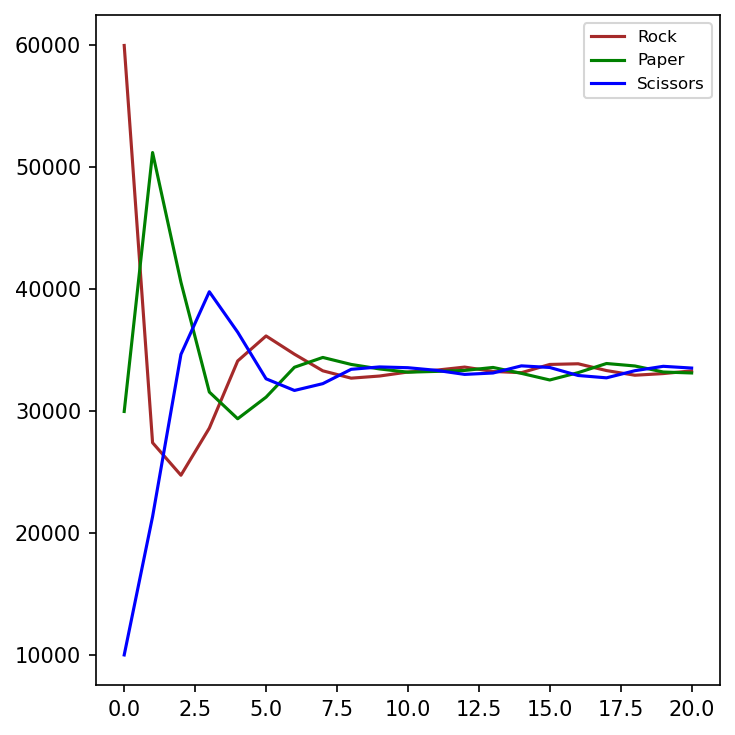

[[    0     2 57319     1     3    42]
 [    1     1 28078     2     2    44]
 [    2     1 46130     1     2    44]
 ...
 [99997     0 29498     2     3    40]
 [99998     0 13598     0     2    43]
 [99999     2 42552     2     2    42]]


In [3]:
# RPS numpy

import numpy as np
import matplotlib.pyplot as plt

N = 100000
T = 20

probs = [0.6, 0.3, 0.1] # initial prob of playing R, P, S

# 0-own id, 1-own strat, 2-opponent id, 3-opponent strat
# 4-last game points, 5-total points 
POP = np.zeros((N, 6), dtype = np.int32)

POP[:, 0] = np.arange(N)

# x[0]
# Out[4]: array([0, 0, 1])
# np.argmax(x[0])
# Out[5]: 2

# 0 - Rock, 1 - Paper, 2 - Scissors
POP[:, 1] = np.argmax(np.random.multinomial(1, probs, N), axis = 1)

data = np.zeros((T + 1, 3), dtype = np.int32)

RPS = np.array([2, 1, 3, 3, 2, 1, 1, 3, 2]).reshape(3, 3)

for i in range(3):
    data[0, i] = np.sum(POP[:, 1] == i)
    
for t in range(T):
    
    match = np.arange(N)
    np.random.shuffle(match) # no new object
    
    for i in range(0, N, 2):
        p1 = match[i]
        p2 = match[i + 1]
        POP[p1, 2] = p2
        POP[p2, 2] = p1
    
    POP[:, 3] = POP[POP[:, 2], 1]
    POP[:, 4] = RPS[POP[:, 1], POP[:, 3]]
    POP[:, 5] += POP[:, 4]
    
    lost = POP[:, 4] == 1 # lost
    change = np.random.binomial(1, 0.99, N) # pr change
    lost_change = np.logical_and(lost, change) # lost AND change
    POP[lost_change, 1] = POP[lost_change, 3] # adopt opponents strat
    
    ties = POP[:, 4] == 2 # ties, 2 points
    POP[ties, 1] = np.random.randint(0, 3, np.sum(ties))
    
    for i in range(3):
        data[t+1, i] = np.sum(POP[:, 1] == i)

plt.figure(num=1, figsize=(5,5), dpi=150)
x = range(0, T+1)
plt.plot(x, data[:, 0], color="brown", label="Rock")
plt.plot(x, data[:, 1], color="green", label="Paper")
plt.plot(x, data[:, 2], color="blue", label="Scissors")
plt.legend(loc = "best", fontsize = 8)
plt.tight_layout()
plt.show()
print(POP)

In [40]:
A = np.zeros((5,6), dtype = np.int32)
A[:,1] = np.arange(5)
probs = [0.6, 0.3, 0.1]
A[:,2] = np.argmax(np.random.multinomial(1, probs, 5), axis = 1)
A[:, 3] = A[A[:, 2], 1]
#A[:, 4] = RPS[A[:, 1], A[:, 3]]
A[:, 5] += A[:, 4]
#RPS = np.array([2, 1, 3, 3, 2, 1, 1, 3, 2]).reshape(3, 3)
#A[:, 3] = A[A[:, 2], 1]
print(A)


[[0 0 1 1 0 0]
 [0 1 1 1 0 0]
 [0 2 1 1 0 0]
 [0 3 1 1 0 0]
 [0 4 1 1 0 0]]
